## IMPORTING LIBRARIES AND PACKAGES

In [1]:
import pandas as pd
from nltk import word_tokenize, sent_tokenize
import sys
print(sys.executable)
!/Users/nguyenvinhtotam/opt/anaconda3/bin/python -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem import WordNetLemmatizer
!pip3 install langdetect
from langdetect import detect_langs
!pip3 install langdetect
!pip3 install textblob
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

/Users/nguyenvinhtotam/opt/anaconda3/bin/python


## IMPORTING DATASET

In [2]:
df = pd.read_csv("1429_1.csv")
df

/Users/nguyenvinhtotam/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

## CLEANING DATA

In [3]:
df1 = df.dropna(subset=['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username'])
df1
df1.rename({'reviews.text':'text'}, axis=1, inplace=True)
df1

/Users/nguyenvinhtotam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, I

# 1. SENTIMENT ANALYSIS

### Create polarity column

In [4]:
df1['sentiment_polarity'] = df1['text'].apply(lambda t: TextBlob(t).sentiment.polarity)


/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/3647391071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment_polarity'] = df1['text'].apply(lambda t: TextBlob(t).sentiment.polarity)


In [5]:
polarity = []

for i in df1['sentiment_polarity']:
    if i<0:
        polarity.append('Negative')
    elif i==0:
        polarity.append('Neutral')
    else:
        polarity.append('Positive')

df1['polarity']=polarity

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/1921889551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity']=polarity


### Create subjectivity column

In [6]:
df1['sentiment_subjectivity'] = df1['text'].apply(lambda t: TextBlob(t).sentiment.subjectivity)

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/313064716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment_subjectivity'] = df1['text'].apply(lambda t: TextBlob(t).sentiment.subjectivity)


In [7]:
subjectivity =[]
for i in df1['sentiment_subjectivity']:
    if i<0.5:
        subjectivity.append('Objective')
    else:
        subjectivity.append('Subjective')
df1['subjectivity']=subjectivity

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/475132957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['subjectivity']=subjectivity


### Polarity percentage

In [8]:
df1['polarity'].value_counts()

Positive    31125
Neutral      1998
Negative     1497
Name: polarity, dtype: int64

In [9]:
polarity_percent = df1.polarity.value_counts()/len(df1)
polarity_percent

Positive    0.899047
Neutral     0.057712
Negative    0.043241
Name: polarity, dtype: float64

<AxesSubplot:ylabel='polarity'>

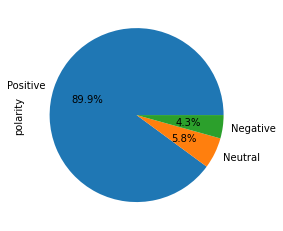

In [47]:
df1.polarity.value_counts().plot.pie(autopct='%1.1f%%')

### Subjectivity percentage

In [12]:
df1['subjectivity'].value_counts()

Subjective    23704
Objective     10916
Name: subjectivity, dtype: int64

In [13]:
df1['subjectivity'].value_counts()/len(df1)

Subjective    0.684691
Objective     0.315309
Name: subjectivity, dtype: float64

<AxesSubplot:ylabel='subjectivity'>

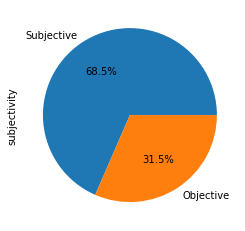

In [48]:
df1.subjectivity.value_counts().plot.pie(autopct='%1.1f%%')

### Create binary column for the sentiment

In [15]:
score = []
for i in df1['polarity']:
    if i == 'Positive':
        score.append(1)
    else:
        score.append(0)
df1['score']=score

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/2318241301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['score']=score


# 2. Reviews Exploration

###  Reviews length

In [16]:
length_reviews = df1.text.str.len()

In [17]:
max(length_reviews) # The longest review is 10670 words
min(length_reviews) # The shortest review is 3 words

3

### Number of word tokens in a review function

In [18]:
word_token = [word_tokenize(t) for t in df1['text']]
len_tokens = []
for i in range(len(word_token)):
     len_tokens.append(len(word_token[i]))
        
df1['n_tokens'] = len_tokens

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/454327713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['n_tokens'] = len_tokens


In [19]:
max(df1.n_tokens) # The maximum word tokens in a review is 2207
min(df1.n_tokens) # The maximum word tokens a review is 1

1

### Number of sentences in a review function

In [20]:
sent_token =[sent_tokenize(t) for t in df1['text']]
no_sent =[]
for i in range(len(sent_token)):
    no_sent.append(len(sent_token[i]))
df1['no_sent']=no_sent

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/3751113554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['no_sent']=no_sent


Maximum and minimum sentences in a review

In [21]:
max(df1.no_sent) # The maximum sentences in a review is 96
min(df1.no_sent) # The minimum sentences in a review is 1

1

### Detecting language

In [22]:
def det(x):
    try:
        lang = detect_langs(x)
    except:
        lang = 'Other'
    return lang

df1['Lang'] = df1['text'].apply(det)

/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/3106157082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lang'] = df1['text'].apply(det)


In [23]:
languages = [str(df1.Lang[0]).split(':')[0][1:] for lang in df1.Lang]
df1['language']=languages


/var/folders/tx/sdpbjwf93pgfzx7md8vt0c_c0000gn/T/ipykernel_96000/2073290591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['language']=languages


In [24]:
pd.DataFrame(df1.groupby('language').text.count().sort_values(ascending=False))

,text
language,
en,34620


# 3. WORDCLOUD

### Word cloud for overall reviews

In [25]:
text = ' '.join(df1['text'])
word_tokens = word_tokenize(text)
lower_text = [t.lower() for t in word_tokens]
isalpha_text = [t for t in lower_text if t.isalpha()]
english_stops = set(stopwords.words('english'))
no_stops = [t for t in isalpha_text if t not in english_stops]

Lemmatizing

In [26]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(bow.most_common(10))
cleaned_token = ' '.join(lemmatized)

[('great', 11778), ('tablet', 9990), ('love', 9244), ('use', 7612), ('easy', 6156), ('amazon', 5827), ('kindle', 5273), ('one', 5113), ('bought', 5050), ('good', 5023)]


Create wordcloud

<function matplotlib.pyplot.show(close=None, block=None)>

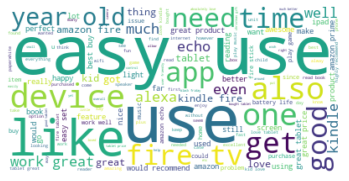

In [27]:
my_cloud = WordCloud(background_color = 'white',stopwords=english_stops).generate(cleaned_token)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show

### Word cloud for positive reviews

In [28]:
positive_reviews = df1[df1['score']==1]['text'].tolist()

In [29]:
positive_reviews = ''.join(positive_reviews)

In [30]:
positive_tokens = word_tokenize(positive_reviews)

In [31]:
positive_tokens = [t.lower() for t in positive_tokens]

In [32]:
positive_tokens = [t for t in positive_tokens if t.isalpha()]

In [33]:
positive_tokens = ' '.join(positive_tokens)

In [34]:
my_stop_words = set(STOPWORDS)
my_stop_words.update(["use","bought"])

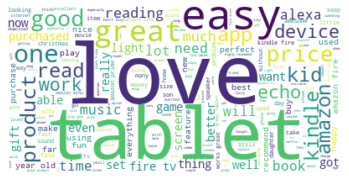

In [35]:
positive_cloud = WordCloud(background_color='white',stopwords=my_stop_words).generate(positive_tokens)
plt.imshow(positive_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

### Word cloud for negative reviews

In [36]:
negative_reviews = df1[df1['score']==0]['text'].tolist()
negative_reviews = ''.join(negative_reviews)
negative_tokens = word_tokenize(negative_reviews)
negative_tokens = [t.lower() for t in negative_tokens]
negative_tokens = [t for t in negative_tokens if t.isalpha()]
negative_tokens = ' '.join(negative_tokens)

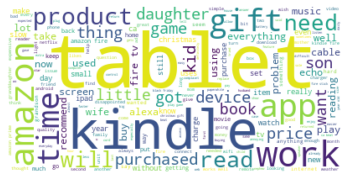

In [37]:
my_stopwords= set(STOPWORDS)
my_stopwords.update(["use","bought","one","love","loves"])
negative_cloud = WordCloud(background_color='white',stopwords=my_stopwords).generate(negative_tokens)
plt.imshow(negative_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

# 4. VECTORIZER

In [38]:
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df1.text)
X = vect.transform(df1.text)
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
        able  absolutely    access  add  alexa   amazing    amazon  \
0  0.000000         0.0  0.000000  0.0    0.0  0.000000  0.000000   
1  0.000000         0.0  0.000000  0.0    0.0  0.000000  0.000000   
2  0.000000         0.0  0.000000  0.0    0.0  0.000000  0.000000   
3  0.183591         0.0  0.209204  0.0    0.0  0.199642  0.000000   
4  0.000000         0.0  0.000000  0.0    0.0  0.000000  0.155234   

   amazon echo  amazon prime  amazon tv  ...  wife  wifi  wish  work  works  \
0          0.0           0.0        0.0  ...   0.0   0.0   0.0   0.0    0.0   
1          0.0           0.0        0.0  ...   0.0   0.0   0.0   0.0    0.0   
2          0.0           0.0        0.0  ...   0.0   0.0   0.0   0.0    0.0   
3          0.0           0.0        0.0  ...   0.0   0.0   0.0   0.0    0.0   
4          0.0           0.0        0.0  ...   0.0   0.0   0.0   0.0    0.0   

   works great  worth  year  year old  years  
0          0.0    0.0   0.0     

# 5. SENTIMENT PREDICTION

### Build and asses a model

In [39]:
y = df1['score']
X = reviews_transformed

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

### Logistic Regression

In [41]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [42]:
y_predicted = log_reg.predict(X_test)

In [43]:
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.9192663200462161
[[0.03697285 0.06224726]
 [0.01848642 0.88229347]]


In [44]:
pd.crosstab(y_test,y_predicted,rownames=['Actual'],colnames=['Predict'])

Predict,0,1
Actual,,
0,256,431
1,128,6109


### Predicted probabilities

In [45]:
prob_0 = log_reg.predict_proba(X_test)[:,0]
prob_1 = log_reg.predict_proba(X_test)[:, 1]

In [46]:
print("First 10 predicted probabilities of negative: ", prob_0[:10])
print("First 10 predicted probabilities of positive: ", prob_1[:10])

First 10 predicted probabilities of negative:  [0.09126925 0.03346011 0.12584013 0.11637092 0.079024   0.04795717
 0.0103453  0.02253391 0.01565096 0.02123926]
First 10 predicted probabilities of positive:  [0.90873075 0.96653989 0.87415987 0.88362908 0.920976   0.95204283
 0.9896547  0.97746609 0.98434904 0.97876074]
